## 인하대 학생들은 주식 수익률이 평균적으로 얼마나 나올까? 

### 인하대 학생들이 에브리타임에서 언급한 상위10개 주식들을 포트폴리오 최적화를 시켰을때 수익률을 알아보자

1. 포트폴리오 최적화한 비율로 나온 수익률

2. 동일 비율로 포트폴리오 구성한 수익률 

In [5]:
import os
os.chdir("E:/")
print(os.getcwd())

E:\


In [30]:
from selenium import webdriver

driver = webdriver.Chrome('E:/chromedriver_win32/chromedriver.exe')
driver.implicitly_wait(1)

driver.get('https://everytime.kr/login')
driver.find_element_by_name('userid').send_keys('whitecrow')
driver.find_element_by_name('password').send_keys('1q2w3e4r!')
driver.find_element_by_xpath('//*[@class="submit"]/input').click()
driver.implicitly_wait(1)

# <수집자료>
# 에브리타임 주식게시판을 50p까지 크롤링 
## 기간 2019/11/20~ 2020/11/18 

In [ ]:
# result text files
results = []
cnt = 0 # 첫번째 페이지부터 순환하기 위함.

# go to the list (first page)
while True:

    print('Page '+str(cnt))
    
    if cnt > 20: # 나중에 10,000 개로 수정
        break
        
    cnt = cnt + 1
    driver.get('https://everytime.kr/449566/p/'+ str(cnt))
    driver.implicitly_wait(1)

    # get articles link
    posts = driver.find_elements_by_css_selector('article > a.article')
    links = [post.get_attribute('href') for post in posts]
    
    # get detail article
    for link in links:
        driver.get(link)
        
        # get text
        comments = driver.find_elements_by_css_selector('p.large')
        
        for comment in comments:
            results.append(comment.text)

Page 0
Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20


# <데이터 탐색 및 전처리>

In [125]:
results

['사.랑.해.요 페.인.트',
 'kia~ ㅊㅊㅊ!!!',
 '와',
 '넷마블 존버 43일차 -22% 세븐나이츠2 개노잼이네 5분 하고 삭제 했다 내돈 우야누 ㅠㅠㅠ',
 '43일차면 최고점에 들어갔누 반년은 걸리겠다',
 '반년 걸리면 다행이지 평생 안올수도 잇다 ㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋ 이분 사라져서 좀 걱정했는데 다행이누',
 '지금까지의 털썩좌 추천픽 목록\n\n씨젠\n삼성생명\n경방\n차바이오텍\n셀리버리\n한진칼\nHDC현대산업개발\n메디톡스\n위지윅스튜디오\n녹십자홀딩스\n\n그는 신이다',
 '그사람이 누군데',
 '인주스 지박령',
 '인주스가 머임',
 '주식 시작\n내년에 시작해도 늦지 않겠죠?',
 '이미 늦음 3월,4월에 햇어야함 할거면',
 '언제 해도 늦지 않고 언제 해도 늦음 ㅋㅋㅋ 걍 해',
 '걍 지금부터해',
 '늦었다고 생각되면 인버스 타면 됨.',
 '천천히해도 ㄱㅊ',
 '음 얼마 못가겠군',
 '늦고 빠르고가 어딨노',
 '감사합니다 인하대학교',
 'ㅗㅜㅑ',
 'ㅗㅜㅗㅜ..',
 'ㅗㅜㅗㅜㅗㅜ',
 '이때 주식추천한거 한개빼고 다 잘가네\n위에서부터 순서대로 매수가ㅡ매도가임\n2240-3400\n4000-4900\n1300-1320\n31900-진행중\n박셀바이오는 지금 2연상중\n연말에 돈쓸어담네',
 '박셀 내일 폭락할듯',
 '키움쓰는데 저렇게 주황색으로 뜨는건 왜그러는거?',
 'vi(변동성 완화 장치)발동 가격 표시입니다!',
 '감사합니다!',
 '😀',
 '코로나 끝나면 환율 오르나요?',
 '훨훨 날아가라',
 '따따블 ㅊㅊ',
 '오 얼마벌엇누',
 'ㅗㅜㅗㅜ..',
 '카톡 들어가고깊은데 코드머에여',
 '백만원 단타 재밌네\n10분 걸린거임',
 '삭제된 댓글입니다.',
 '다음 종목에서 절반 반납하고 영웅문 꺼버림ㅅㅂ',
 '잃어서 엿같은데 뇌동할거 같아서 참음',
 '그맛에 단타하지',
 '태경케미컬 간드아!!!',
 '대출 신용 다땡겨서\nSK우 500넣었다\n\n한달후에 까봐야지\n최회

## 불용어 처리

In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\장세환\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [83]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [74]:
stopwords=open("E:/한국어불용어100_.txt",'r')

In [75]:
stopwords

<_io.TextIOWrapper name='E:/한국어불용어100_.txt' mode='r' encoding='cp65001'>

In [76]:
stop=stopwords.read()

In [80]:
stop=stop.split()
stop_list=[]
for i in range(len(stop)):
    if i%3==0:
        stop_list.append(stop[i])
stop_list        

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '이',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

## 추가 불용어 처리

In [97]:
stop_list=stop_list+['.','!','ㅠ','?','ㅅㅂ','%','vs','ㅊ']

In [98]:
results[2]

'넷마블 존버 43일차 -22% 세븐나이츠2 개노잼이네 5분 하고 삭제 했다 내돈 우야누 ㅠㅠㅠ'

In [99]:
tok=word_tokenize(results[2])

In [100]:
def stopword(word_tokenize):
    test=[]
    for w in word_tokenize:
        if w not in stop_list:
            test.append(w)
    return test        

In [107]:
stopword(tok)

['와', '깨어있는', '아버님이다']

In [155]:
token_list=[]
for i in range(len(results)):
    tok=word_tokenize(results[i])
    token_list+=stopword(tok)
token_list

['사.랑.해.요',
 '페.인.트',
 'kia~',
 'ㅊㅊㅊ',
 '와',
 '넷마블',
 '존버',
 '43일차',
 '-22',
 '세븐나이츠2',
 '개노잼이네',
 '5분',
 '하고',
 '삭제',
 '했다',
 '내돈',
 '우야누',
 'ㅠㅠㅠ',
 '43일차면',
 '최고점에',
 '들어갔누',
 '반년은',
 '걸리겠다',
 '반년',
 '걸리면',
 '다행이지',
 '평생',
 '안올수도',
 '잇다',
 'ㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋ',
 '이분',
 '사라져서',
 '걱정했는데',
 '다행이누',
 '지금까지의',
 '털썩좌',
 '추천픽',
 '목록',
 '씨젠',
 '삼성생명',
 '경방',
 '차바이오텍',
 '셀리버리',
 '한진칼',
 'HDC현대산업개발',
 '메디톡스',
 '위지윅스튜디오',
 '녹십자홀딩스',
 '그는',
 '신이다',
 '그사람이',
 '누군데',
 '인주스',
 '지박령',
 '인주스가',
 '머임',
 '주식',
 '시작',
 '내년에',
 '시작해도',
 '늦지',
 '않겠죠',
 '이미',
 '늦음',
 '3월,4월에',
 '햇어야함',
 '할거면',
 '언제',
 '해도',
 '늦지',
 '않고',
 '언제',
 '해도',
 '늦음',
 'ㅋㅋㅋ',
 '걍',
 '해',
 '걍',
 '지금부터해',
 '늦었다고',
 '생각되면',
 '인버스',
 '타면',
 '됨',
 '천천히해도',
 'ㄱㅊ',
 '음',
 '얼마',
 '못가겠군',
 '늦고',
 '빠르고가',
 '어딨노',
 '감사합니다',
 '인하대학교',
 'ㅗㅜㅑ',
 'ㅗㅜㅗㅜ',
 '..',
 'ㅗㅜㅗㅜㅗㅜ',
 '이때',
 '주식추천한거',
 '한개빼고',
 '다',
 '잘가네',
 '위에서부터',
 '순서대로',
 '매수가ㅡ매도가임',
 '2240-3400',
 '4000-4900',
 '1300-1320',
 '31900-진행중',
 '박셀바이오는',
 '2연상중',
 '연말에',
 '돈쓸어담네',
 '박셀',
 '내일',
 '

In [154]:
token_list  '룩스'

TypeError: 'in <string>' requires string as left operand, not list

## 명사, 형용사, 부사등 형태소태그 붙여줌 

In [111]:
from konlpy.tag import Twitter
from collections import Counter

In [127]:
twitter = Twitter()
morphs = [] 
for sentence in token_list:
    morphs.append(twitter.pos(sentence)) 
print(morphs)

[[('사', 'Noun'), ('.', 'Punctuation'), ('랑', 'Josa'), ('.', 'Punctuation'), ('해', 'Noun'), ('.', 'Punctuation'), ('요', 'Noun')], [('페', 'Noun'), ('.', 'Punctuation'), ('인', 'Noun'), ('.', 'Punctuation'), ('트', 'Noun')], [('kia', 'Alpha'), ('~', 'Punctuation')], [('ㅊㅊㅊ', 'KoreanParticle')], [('와', 'Verb')], [('넷마블', 'Noun')], [('존버', 'Noun')], [('43일', 'Number'), ('차', 'Foreign')], [('-', 'Punctuation'), ('22', 'Number')], [('세븐', 'Noun'), ('나이', 'Noun'), ('츠', 'Noun'), ('2', 'Number')], [('개', 'Noun'), ('노잼', 'Noun'), ('이네', 'Josa')], [('5분', 'Number')], [('하고', 'Verb')], [('삭제', 'Noun')], [('했다', 'Verb')], [('내', 'Determiner'), ('돈', 'Noun')], [('우야', 'Adverb'), ('누', 'Noun')], [('ㅠㅠㅠ', 'KoreanParticle')], [('43일', 'Number'), ('차면', 'Foreign')], [('최고점', 'Noun'), ('에', 'Josa')], [('들어갔', 'Verb'), ('누', 'Noun')], [('반년', 'Noun'), ('은', 'Josa')], [('걸리겠다', 'Verb')], [('반년', 'Noun')], [('걸리면', 'Verb')], [('다행', 'Noun'), ('이지', 'Josa')], [('평생', 'Noun')], [('안', 'VerbPrefix'), ('올수도', 'Ve

## 명사, 길이가 1 이상인 것만 출력

In [128]:
noun_list=[] 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and len(word) > 1:
            noun_list.append(word)

print(noun_list)

['넷마블', '존버', '세븐', '나이', '노잼', '삭제', '최고점', '반년', '반년', '다행', '평생', '이분', '걱정', '다행', '지금', '털썩', '추천', '목록', '씨젠', '삼성', '생명', '경방', '바이오', '한진', '현대', '산업', '개발', '디톡스', '위지윅', '스튜디오', '녹십자', '홀딩스', '사람', '주스', '박령', '주스', '머임', '주식', '시작', '내년', '시작', '언제', '해도', '언제', '해도', '지금', '생각', '버스', '해도', '얼마', '인하', '대학교', '주식', '추천', '순서대로', '매수', '매도', '진행중', '박셀', '바이오', '연상', '연말', '박셀', '내일', '폭락', '주황색', '변동성', '완화', '장치', '발동', '가격', '표시', '코로나', '환율', '훨훨', '따따', '얼마', '엇누', '카톡', '코드', '백만원', '단타', '삭제', '댓글', '다음', '종목', '절반', '반납', '영웅문', '뇌동', '단타', '태경', '케미컬', '간드', '대출', '신용', '달후', '회장', '대출', '정도', '스크', '투자', '경험', '제일', '대기업', '인하', '언제', '대한항공', '매수', '심장', '주주', '방금', '삼성', '전자', '주식', '수익', '고민', '그냥', '가지', '아무', '그냥', '수익', '파시', '이병철', '이건희', '이재용', '회장', '삼전', '갑자기', '삼전', '백신', '돌입', '평생', '볼일', '아야', '갑자기', '내일', '대한항공', '퍼먹', '마감', '내일', '어찌', '기업', '준비', '기분', '낫밷', '기분', '조만간', '개성', '공단', '재개', '원우', '아야', '조금', '생각', '북한', '원칙', '주의자', '종근당', '바이오', '종근당'

In [129]:
# 빈도순으로 정렬
count = Counter(noun_list)
words = dict(count.most_common())

words


{'주식': 165,
 '추천': 63,
 '종목': 60,
 '오늘': 56,
 '생각': 52,
 '댓글': 50,
 '매수': 49,
 '삭제': 47,
 '시작': 45,
 '버스': 39,
 '투자': 39,
 '사람': 36,
 '그냥': 33,
 '지금': 29,
 '계좌': 28,
 '톡방': 26,
 '정도': 25,
 '진짜': 24,
 '수수료': 24,
 '프로': 23,
 '공부': 23,
 '거래': 22,
 '보고': 22,
 '해외': 22,
 '마이크로': 22,
 '내일': 21,
 '단타': 20,
 '수익률': 20,
 '미국': 20,
 '비번': 20,
 '계속': 20,
 '언제': 19,
 '얼마': 19,
 '매도': 19,
 '증권': 18,
 '수익': 17,
 '어제': 17,
 '오픈': 17,
 '이번': 17,
 '가요': 16,
 '여기': 16,
 '이제': 16,
 '디지탈': 16,
 '존버': 15,
 '삼성': 15,
 '배당': 15,
 '국내': 15,
 '카카오': 15,
 '룩스': 15,
 '코로나': 14,
 '전자': 14,
 '애플': 14,
 '월요일': 14,
 '잡담': 14,
 '삼전': 13,
 '관련': 13,
 '장기': 13,
 '간다': 13,
 '개미': 13,
 '바로': 13,
 '코인': 13,
 '기업': 12,
 '한번': 12,
 '거의': 12,
 '인하대': 12,
 '적금': 12,
 '개인': 12,
 '테슬라': 12,
 '카톡': 11,
 '거기': 11,
 '이득': 11,
 '어차피': 11,
 '요즘': 11,
 '그거': 11,
 '혹시': 11,
 '증권사': 11,
 '때문': 11,
 '나스닥': 11,
 '이유': 11,
 '정보': 11,
 '얘기': 11,
 '대한항공': 10,
 '고민': 10,
 '갑자기': 10,
 '평단': 10,
 '상한': 10,
 '하나': 10,
 '선물': 10,
 '게시판': 10,
 '어

## 상위에서 빈도수가 많은 기업

1. 삼성

2. 마이크로소프트

3. 카카오

4. 애플

5. 테슬라

6. 대한항공

7. 보잉

8. 한진

9. 넷마블

10. 박셀

11. 네이버

12. 셀트리온

13. 빅히트

In [150]:
from datetime import datetime
import pandas_datareader.data as wb
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


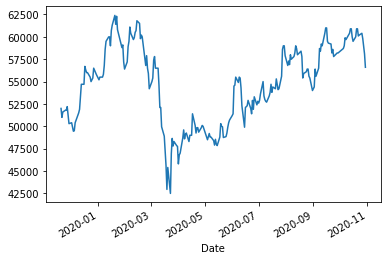

In [215]:
start = datetime(2019,11,20)
end = datetime(2020,10,30)
samsung = wb.DataReader('005930.KS', 'yahoo',start,end)
samsung['Close'].plot()

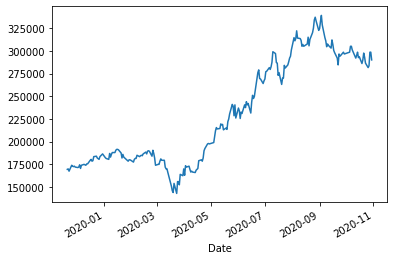

In [207]:
naver['Close'].plot()

In [216]:
# 박셀바이오가 없어 네이버로 대체
samsung = wb.DataReader('005930.KS', 'yahoo',start,end)
kakao = wb.DataReader('035720.KS', 'yahoo',start,end)
koreaair = wb.DataReader('003490.KS', 'yahoo',start,end)
hanjin = wb.DataReader('002320.KS', 'yahoo',start,end)
netmable = wb.DataReader('251270.KS', 'yahoo',start,end)
# bagsell=wb.DataReader('323990.KS', 'yahoo',start,end)
AAPL= wb.DataReader('AAPL', 'yahoo',start,end)
MSFT= wb.DataReader('MSFT', 'yahoo',start,end)
naver = wb.DataReader('035420.KS', 'yahoo',start,end)
TSLA= wb.DataReader('TSLA', 'yahoo',start,end)


In [217]:
symbols = ['AAPL', 'TSLA', 'MSFT', 'naver','netmable','samsung','kakao','hanjin','koreaair']
data = pd.DataFrame()
data['AAPL']=AAPL['Close']
data['TSLA']=TSLA['Close']
data['MSFT']=MSFT['Close']
data['samsung']=samsung['Close']
data['kakao ']=kakao['Close']
data['naver']=naver['Close']
data['koreaair']=koreaair['Close']
data['hanjin']=hanjin['Close']
data['netmable']=netmable['Close']

data.columns = symbols
noa = len(symbols)
data.tail()

,AAPL,TSLA,MSFT,naver,netmable,samsung,kakao,hanjin,koreaair
Date,,,,,,,,,
2020-10-26,115.050003,420.279999,210.080002,60400.0,329500.0,281500.0,21400.0,51700.0,121500.0
2020-10-27,116.599998,424.679993,213.250000,59800.0,334000.0,283500.0,20750.0,51200.0,122500.0
2020-10-28,111.199997,406.019989,202.679993,59000.0,346500.0,298500.0,20800.0,50400.0,126000.0
2020-10-29,115.320000,410.829987,204.720001,58100.0,343000.0,298500.0,20300.0,49000.0,123500.0
2020-10-30,108.860001,388.040009,202.470001,56600.0,330000.0,290000.0,19950.0,47150.0,117000.0


In [218]:
data

,AAPL,TSLA,MSFT,naver,netmable,samsung,kakao,hanjin,koreaair
Date,,,,,,,,,
2019-11-19,66.572502,71.903999,150.389999,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-20,65.797501,70.444000,149.619995,52000.0,156500.0,169500.0,25350.0,29150.0,87800.0
2019-11-21,65.502502,70.966003,149.479996,51000.0,154000.0,170000.0,24900.0,30000.0,87000.0
2019-11-22,65.445000,66.608002,149.589996,51600.0,153000.0,167500.0,24900.0,30050.0,88200.0
2019-11-25,66.592499,67.267998,151.229996,51800.0,156500.0,174000.0,25500.0,30500.0,89600.0
...,...,...,...,...,...,...,...,...,...
2020-10-26,115.050003,420.279999,210.080002,60400.0,329500.0,281500.0,21400.0,51700.0,121500.0
2020-10-27,116.599998,424.679993,213.250000,59800.0,334000.0,283500.0,20750.0,51200.0,122500.0
2020-10-28,111.199997,406.019989,202.679993,59000.0,346500.0,298500.0,20800.0,50400.0,126000.0


# 포트폴리오 최적화

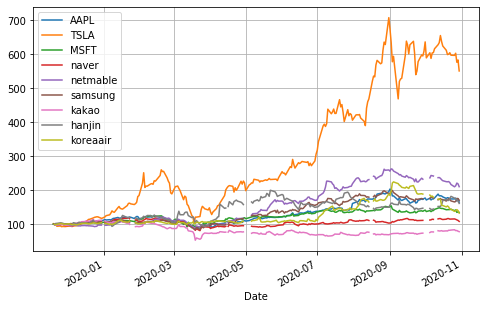

In [219]:
(data / data.iloc[1] * 100).plot(figsize=(8, 5), grid=True)
plt.show()

In [162]:
rets = np.log(data / data.shift(1))
rets.mean() * 252
#252곱하는 이유 = 일간 파라미터로 계산된 값을 연간 파라미터로 변환

AAPL        0.518520
TSLA        1.777472
MSFT        0.313534
naver       0.136484
netmable    0.710745
samsung     0.596974
kakao      -0.109378
hanjin      0.481987
koreaair    0.424328
dtype: float64

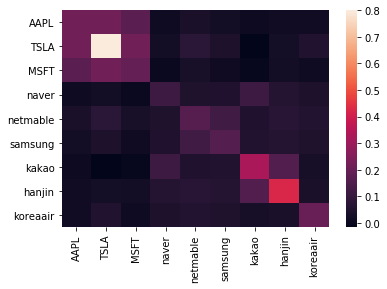

In [163]:
sns.heatmap(rets.cov() * 252)
plt.show()

In [164]:
np.random.seed(2)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.13127699, 0.00780632, 0.16550202, 0.1310745 , 0.12657171,
       0.099463  , 0.0616192 , 0.18646096, 0.09022528])

In [165]:
np.sum(rets.mean() * weights) * 252

0.4224795093501363

In [166]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.0768632355342128

In [167]:
np.random.seed(2)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.13127699, 0.00780632, 0.16550202, 0.1310745 , 0.12657171,
       0.099463  , 0.0616192 , 0.18646096, 0.09022528])

In [168]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

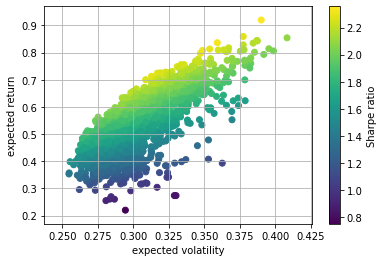

In [169]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

# 샤프지수 최대화

In [170]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        포트폴리오 내의 증권 비중
    
    Returns
    =======
    pret : float
        포트폴리오 수익률의 기댓값
    pvol : float
        포트폴리오 변동성의 기댓값
    pret / pvol : float
        무위험 이자율이 0일 때의 포트폴리오 샤프 지수
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [171]:
import scipy.optimize as sco

In [172]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [173]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [174]:
bnds = tuple((0, 1) for x in range(noa))
noa * [1. / noa,]

[0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

In [175]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [176]:
statistics(opts['x']).round(3)

array([0.971, 0.395, 2.46 ])

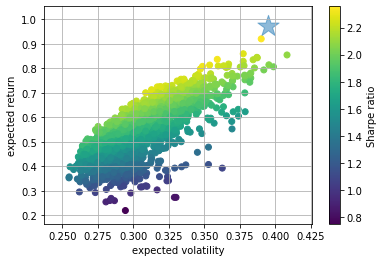

In [177]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_opts = statistics(opts['x']).round(3)
plt.scatter(pt_opts[1], pt_opts[0], marker="*", s=500, alpha=0.5)
plt.show()


# 포트폴라오 분산 최적화 

In [178]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [179]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

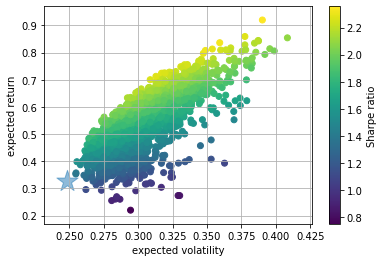

In [180]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_optv = statistics(optv['x']).round(3)
plt.scatter(pt_optv[1], pt_optv[0], marker="*", s=500, alpha=0.5)
plt.show()

In [237]:
optv['x'].round(3)

array([0.022, 0.   , 0.246, 0.361, 0.012, 0.166, 0.003, 0.036, 0.154])

# 효율적 투자선

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [181]:

def min_func_port(weights):
    return statistics(weights)[1]

In [182]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 8.03 s


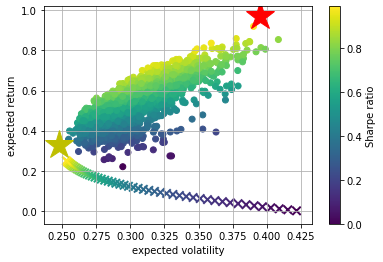

In [183]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # 무작위 포트폴리오
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x', s=70, linewidth=2)
            # 효율적 투자선
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=30)
            # 최대 샤프 지수를 가진 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=30)
            # 최소 분산 포트폴리오
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [238]:
optv['x'].round(3)

array([0.022, 0.   , 0.246, 0.361, 0.012, 0.166, 0.003, 0.036, 0.154])

In [240]:
a=mean_portfolio.iloc[-1]

total=0
for i in range(len(a)):
    total+=a[i]*optv['x'].round(3)[i]
    
print(total) 

133.73496103944993


## 1년동안 33%의 수익률을 보인다!

# 동일 비율 포트폴리오

In [226]:
data

,AAPL,TSLA,MSFT,naver,netmable,samsung,kakao,hanjin,koreaair
Date,,,,,,,,,
2019-11-19,66.572502,71.903999,150.389999,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-20,65.797501,70.444000,149.619995,52000.0,156500.0,169500.0,25350.0,29150.0,87800.0
2019-11-21,65.502502,70.966003,149.479996,51000.0,154000.0,170000.0,24900.0,30000.0,87000.0
2019-11-22,65.445000,66.608002,149.589996,51600.0,153000.0,167500.0,24900.0,30050.0,88200.0
2019-11-25,66.592499,67.267998,151.229996,51800.0,156500.0,174000.0,25500.0,30500.0,89600.0
...,...,...,...,...,...,...,...,...,...
2020-10-26,115.050003,420.279999,210.080002,60400.0,329500.0,281500.0,21400.0,51700.0,121500.0
2020-10-27,116.599998,424.679993,213.250000,59800.0,334000.0,283500.0,20750.0,51200.0,122500.0
2020-10-28,111.199997,406.019989,202.679993,59000.0,346500.0,298500.0,20800.0,50400.0,126000.0


In [227]:
mean_portfolio=data / data.iloc[1] * 100

In [236]:
a=mean_portfolio.iloc[-1]

total=0
for i in range(len(a)):
    total+=a[i]/len(a)
    
print(total) 


190.6804630752184


## 1년 동안 90% 의 수익률을 보인다!! 

# <분석결과>
## 포트폴리오 최적화는 위험을 줄이는데 목적이 있으므로 균등 포트폴리오보다 수익률이 낮다

## 하지만 인하대학생들이 자주 언급하는 주식들은 최적화된 포트폴리오라도 연 30%의 높은 수익률을 가져다 주었다
